### **Movimiento de un satélite a partir de la ecuación de Kepler.**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.constants import R_earth, GM_earth
from astropy.time import Time
from astropy import units as u

***1. Escriba un código que resuelva el problema del movimiento satelital mediante la ecuación de
 Kepler, utilizando un método de busqueda de raices construido por usted mismo (no utilice
 funciones provenientes de librerias importadas).*** 

*Defino Los parámetros orbitales*

In [3]:
GM = GM_earth.to(u.km**3/u.s**2).value  # km^3/s^2 (constante gravitacional de la Tierra)               
a = 1.30262 * R_earth.to(u.km).value  # km (semi-eje mayor de la órbita)                           
e = 0.16561               
omega = np.radians(15)              
t_p = Time("2025-03-31T00:00:00", format="isot", scale="utc") # Tiempo de paso por el pericentro

Implementamos el método de Newton Rhapson para solucionar la ecuación de kepler para una fecha dada.

In [4]:
def solorbit(t): 
    l = np.sqrt(GM / a**3) * (t-t_p).to(u.s).value # Definimos la anomalía media.
    def kepler(E, l0): #Definimos la función para la ecuación de Kepler.
        return E - e * np.sin(E) - l0
    def dkepler(E): # Definimos la dertivada de la función de Kepler.
        return 1 - e * np.cos(E)
    E0 = (np.pi/4) 
    while np.abs(kepler(E0,l)) > 1e-12: # Método de Newton-Raphson para encontrar la raíz.
        E_n = E0 - kepler(E0,l) / dkepler(E0)
        E0 = E_n
    return E0

Comprobamos la anomalía excéntrica para una órbita completa.

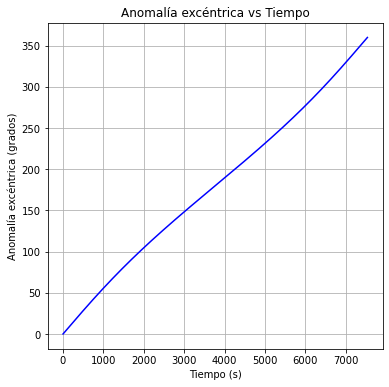

In [5]:
T_0 = (2 * np.pi * np.sqrt(a**3 / (GM)))  # Periodo orbital
t = np.linspace(t_p, t_p + T_0*u.s, 1000)  # Tiempo en fechas.
E_values = []
for j in range(len(t)):
    E_n = solorbit(t[j]) 
    E_values.append(E_n)     
E_f = np.array(E_values)   # Anomalía excéntrica
plt.figure(figsize=(6, 6))
plt.plot((t-t_p).to(u.s).value , np.degrees(E_f), label='Anomalía excéntrica', color='blue')
plt.xlabel('Tiempo (s)')
plt.ylabel('Anomalía excéntrica (grados)')
plt.title('Anomalía excéntrica vs Tiempo')
plt.grid()


***2. Incluya una función 'position(t)' cuyo argumento es el tiempo de observación y retorna las coordenadas del satélite en ese instante.*** 

In [6]:
def position(t):
    E = solorbit(t)
    if E > 0 and E < np.pi: 
        f = 2 * np.arctan(np.sqrt((1 + e) / (1 - e)) * np.tan(E / 2)) 
    else:
        f = 2 * np.arctan(np.sqrt((1 + e) / (1 - e)) * np.tan(E / 2)) + 2*np.pi
    r = a * (1 -e**2) / (1 + e * np.cos(f))
    phi = f + omega
    return r, phi
t_ver = Time("2025-04-01T00:00:00", format="isot", scale="utc") # Tiempo de verificación.
print(f"Las coordenadas r y phi en la fecha {t_ver} son: ({position(t_ver)[0]} km, {np.degrees(position(t_ver)[1]) % 360} grados)")

Las coordenadas r y phi en la fecha 2025-04-01T00:00:00.000 son: (9658.408316347039 km, 185.59655760439784 grados)


Comprobamos las coordenadas en el tiempo para una órbita completa.

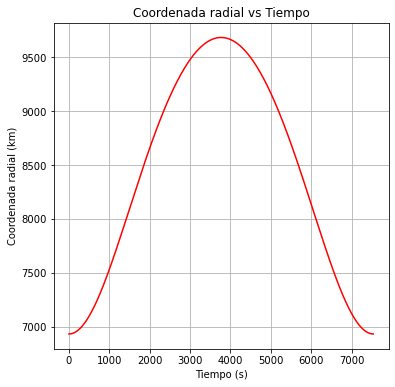

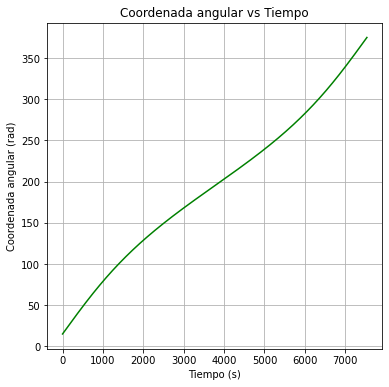

In [7]:
r = []
phi = []
for i in range(len(t)):
    r_i, phi_i = position(t[i])
    r.append(r_i)
    phi.append(phi_i)
r_f = np.array(r)  
phi_f = np.array(phi) 

plt.figure(figsize=(6, 6))
plt.plot((t-t_p).to(u.s).value, r_f, color='red')
plt.xlabel('Tiempo (s)')
plt.ylabel('Coordenada radial (km)')
plt.title('Coordenada radial vs Tiempo')
plt.grid()
plt.show()

plt.figure(figsize=(6, 6))
plt.plot((t-t_p).to(u.s).value, np.degrees(phi_f), color='green')
plt.xlabel('Tiempo (s)')
plt.ylabel('Coordenada angular (rad)')
plt.title('Coordenada angular vs Tiempo')
plt.grid()
plt.show()

***3. Incluya una función 'orbit()' sin argumentos de entrada y que retorna un gráfico con la orbita del satelite a lo largo de un periodo completo.***

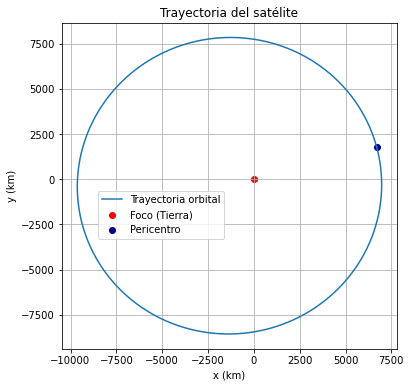

In [8]:
def orbit():
    x = r_f * np.cos(phi_f)  # Coordenada x
    y = r_f * np.sin(phi_f)  # Coordenada y
    plt.figure(figsize=(6, 6))
    plt.plot(x, y, label="Trayectoria orbital")
    plt.scatter(0, 0, color='red', label="Foco (Tierra)")  # foco de la órbita
    plt.scatter(x[0], y[0], color='darkblue', label="Pericentro")  # Pericentro
    plt.xlabel("x (km)")
    plt.ylabel("y (km)")
    plt.legend(bbox_to_anchor = (0.5,0.5))
    plt.title("Trayectoria del satélite")
    plt.grid()
    plt.show()
orbit()

***4. Incluya una función 'date(r0)' cuyo argumento es un valor para la posición radial del satélite, r0. En caso de que esta posición pueda ser alcanzada por el satélite en su movimiento orbital, la función retorna el tiempo t0 en
 el que el satélite se localiza allí.***

**Se presentan dos posibles funciones que realizan lo solicitado.**  

*Primera:*

In [9]:
def date(r0):
    r_d = np.where(r_f == np.max(r_f))  
    r_date = r_d[0][0] 
    if r0 > np.max(r) or r0 < np.min(r):
        sms = "El satelite no se encuentra en esa posicion en ningun momento"
        return print(sms)
    else:
        ind = 0
        dmin = abs(r[0] - r0)
        k = 0
        r_a = r[0]
        while ind < r_date:
            d = abs(r[ind] - r0)
            if d < dmin:
                dmin = d
                k = ind
                r_a = r[ind]
            ind += 1
        ind2 = r_date
        dmin2 = abs(r[r_date] - r0)
        k2 = r_date
        r_a2 = r[r_date]
        while ind2 >= r_date and ind2 < len(r):
            d2 = abs(r[ind2] - r0)
            if d2 < dmin2:
                dmin2 = d2
                k2 = ind2
                r_a2 = r[ind2]
            ind2 += 1
        if r_a == r[r_date-1]:
            t_int =[(t[k-2] - t_p).to(u.s).value, (t[k-1] - t_p).to(u.s).value, (t[k]-t_p).to(u.s).value]
            r_int =[r[k-2], r[k-1], r[k]]
        elif r_a == r[0]:
            t_int =[(t[k] - t_p).to(u.s).value, (t[k+1] - t_p).to(u.s).value, (t[k+2]-t_p).to(u.s).value]
            r_int =[r[k], r[k+1], r[k+2]]
        else:
            t_int =[(t[k-1] - t_p).to(u.s).value, (t[k] - t_p).to(u.s).value, (t[k+1]-t_p).to(u.s).value]
            r_int =[r[k-1], r[k], r[k+1]]
        if r_a2 == r[-1]:
            t_int2 =[(t[k2-2] - t_p).to(u.s).value, (t[k2-1] - t_p).to(u.s).value, (t[k2]-t_p).to(u.s).value]
            r_int2 =[r[k2-2], r[k2-1], r[k2]]
        elif r_a2 == r[r_date]:
            t_int2 =[(t[k2] - t_p).to(u.s).value, (t[k2+1] - t_p).to(u.s).value, (t[k2+2]-t_p).to(u.s).value]
            r_int2 =[r[k2], r[k2+1], r[k2+2]]
        else:
            t_int2 =[(t[k2-1] - t_p).to(u.s).value, (t[k2] - t_p).to(u.s).value, (t[k2+1]-t_p).to(u.s).value]
            r_int2 =[r[k2-1], r[k2], r[k2+1]]
        def interpol(r_n):
            pt = (((r_n-r_int[1])*(r_n-r_int[2]))/((r_int[0]-r_int[1])*(r_int[0]-r_int[2])))*t_int[0] +\
            (((r_n-r_int[0])*(r_n-r_int[2]))/((r_int[1]-r_int[0])*(r_int[1]-r_int[2])))*t_int[1] +\
            (((r_n-r_int[0])*(r_n-r_int[1]))/((r_int[2]-r_int[0])*(r_int[2]-r_int[1])))*t_int[2]
            return pt
        def interpol2(r_n):
            pt2 = (((r_n-r_int2[1])*(r_n-r_int2[2]))/((r_int2[0]-r_int2[1])*(r_int2[0]-r_int2[2])))*t_int2[0] +\
            (((r_n-r_int2[0])*(r_n-r_int2[2]))/((r_int2[1]-r_int2[0])*(r_int2[1]-r_int2[2])))*t_int2[1] +\
            (((r_n-r_int2[0])*(r_n-r_int2[1]))/((r_int2[2]-r_int2[0])*(r_int2[2]-r_int2[1])))*t_int2[2]
            return pt2
        t1 = t_p + interpol(r0)*u.s         
        t2 = t_p + interpol2(r0)*u.s
        return t1, t2

print(f"La primera fecha por donde pasa a {1.5*R_earth.to(u.km).value: .2f} km es {date(1.5*R_earth.to(u.km).value)[0]}")
print(f"La Segunda fecha por donde pasa a {1.5*R_earth.to(u.km).value : .2f} km es {date(1.5*R_earth.to(u.km).value)[1]}")


La primera fecha por donde pasa a  9567.15 km es 2025-03-31T00:53:09.855
La Segunda fecha por donde pasa a  9567.15 km es 2025-03-31T01:12:26.730


In [10]:
def date2(r0):
    if r0 > np.max(r_f) or r0 < np.min(r_f):
        sms = print("En ningun momento el satelite se encuentra en esa posicion")
        return sms
    else:
        finv = np.arccos(1/e*(a*(1-e**2)/r0 - 1))
        E_inv = 2 * np.arctan(np.sqrt((1 - e) / (1 + e)) * np.tan(finv / 2))
        l_inv = E_inv - e * np.sin(E_inv)
        t = (l_inv * np.sqrt(a**3 / GM)) * u.s
        t = t + t_p
        return t
print(date2(1.5*R_earth.to(u.km).value)) # Verificación.

2025-03-31T00:53:09.855
